## Steps

- Dimension reduction
- Linear models from sklearn
- XGBoost
- Neural Network
- Ensemble learning (votes with different models)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import xgboost as xgb
from PIL import Image
import time
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images() 

X_train shape :  (60000, 784)
y_train shape :  (60000,)
X_test shape :  (10000, 784)
y_test shape :  (10000,)
[9 0 0 ..., 6 7 0]


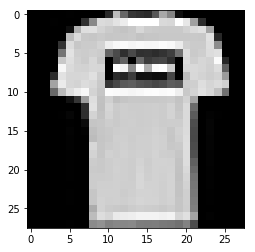

In [4]:
print'X_train shape : ', x_train.shape
print'y_train shape : ', y_train.shape
print'X_test shape : ', x_test.shape
print'y_test shape : ', y_test.shape
print(y_train[:6000])
x_train = x_train/255.0
x_test = x_test/255.0
x_train_small = x_train[:6000]
y_train_small = y_train[:6000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]

N_train, d_train = x_train.shape
N_test, d_test = x_test.shape
plt.imshow(x_train[1].reshape((28,28)), cmap='gray')

## Data augmentation

### 1) Rotation 

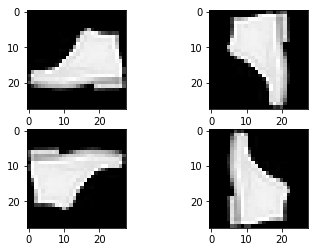

In [8]:
img1 = x_train[42].reshape((28,28))
img2 = np.rot90(img1)
img3 = np.rot90(img2)
img4 = np.rot90(img3)

plt.figure(1)
plt.subplot(221)
plt.imshow(img1, cmap='gray')
plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.subplot(223)
plt.imshow(img3, cmap='gray')
plt.subplot(224)
plt.imshow(img4, cmap='gray')

### 2) Symmetric images

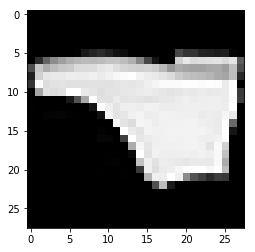

In [9]:
img1 = x_train[42].reshape((28,28))
imgS1 = np.transpose(img1)
imgS2 = np.rot90(imgS1)
plt.imshow(imgS2, cmap='gray')

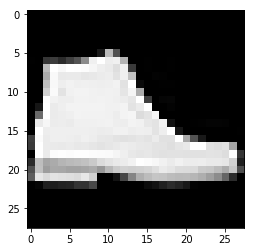

In [10]:
x_trainR1 = np.zeros((N_train,28,28))
x_trainR2 = np.zeros((N_train,28,28))
x_trainR3 = np.zeros((N_train,28,28))
x_trainR4 = np.zeros((N_train,28,28))

x_trainS1 = np.zeros((N_train,28,28))
x_trainS2 = np.zeros((N_train,28,28))
x_trainS3 = np.zeros((N_train,28,28))
x_trainS4 = np.zeros((N_train,28,28))

for i in range(N_train):
    img1 = x_train[i].reshape((28,28))
    img2 = np.rot90(img1)
    img3 = np.rot90(img2)
    img4 = np.rot90(img3)
    x_trainR1[i] = img1
    x_trainR2[i] = img2
    x_trainR3[i] = img3
    x_trainR4[i] = img4
    x_trainS1[i] = np.transpose(img1)
    x_trainS2[i] = np.transpose(img2)
    x_trainS3[i] = np.transpose(img3)
    x_trainS4[i] = np.transpose(img4)
    
plt.imshow(x_trainS2[42],cmap='gray')

In [11]:
y_trainR1 = y_train
y_trainR2 = y_train
y_trainR3 = y_train
y_trainR4 = y_train

y_trainS1 = y_train
y_trainS2 = y_train
y_trainS3 = y_train
y_trainS4 = y_train

### 3) Noisy images

### Data augmentation conclusion

In [13]:
X_train_da = np.concatenate((x_trainR1,x_trainR2,x_trainR3,x_trainR4,x_trainS1,x_trainS2,x_trainS3,x_trainS4), axis=0)
Y_train_da = np.concatenate((y_trainR1,y_trainR2,y_trainR3,y_trainR4,y_trainS1,y_trainS2,y_trainS3,y_trainS4), axis=0)

## Dimension reduction

In [ ]:
#PCA dimension reduction
start = time.time()
pca = decomposition.PCA(n_components=200)
pca.fit(x_train)
X_reduced_train = pca.transform(x_train)
X_reduced_test = pca.transform(x_test)

print'Time in %fs' % (time.time()-start)

In [ ]:
#PCA dimension reduction SMALL Dataset
start = time.time()
pca = decomposition.PCA(n_components=100)
pca.fit(x_train)
x_train_pca = pca.transform(x_train_small)
x_test_pca = pca.transform(x_test_small)

print'Time in %fs' % (time.time()-start)

In [ ]:
#LDA dimension reduction
start = time.time()
lda = LinearDiscriminantAnalysis(n_components=100)
lda.fit(x_train, y_train)
X_train_lda = lda.transform(x_train)
X_test_lda = lda.transform(x_test)

print'Time in %fs' % (time.time()-start)

In [ ]:
#LDA dimension reduction SMALL Dataset
start = time.time()
lda = LinearDiscriminantAnalysis(n_components=200)
lda.fit(x_train_small, y_train_small)
x_train_lda = lda.transform(x_train_small)
x_test_lda = lda.transform(x_test_small)

print'Time in %fs' % (time.time()-start)

In [ ]:
def classifier(clf, x_train, y_train, x_test, y_test):
    start = time.time()
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print'Training score : ', accuracy_score(y_train, y_pred_train)
    print'Testing score : ', accuracy_score(y_test, y_pred_test)
    print'Time in %fs'% (time.time()-start)
    
    return y_pred_train, y_pred_test

### LDA Classifier

In [ ]:
#Without dimension reduction
y_pred_train, y_pred_test = classifier(LinearDiscriminantAnalysis(), x_train, y_train, x_test)

In [ ]:
#With PCA reduction
y_pred_train, y_pred_test = classifier(LinearDiscriminantAnalysis(), X_reduced_train, y_train, X_reduced_test)

In [ ]:
#With LDA reduction
y_pred_train2, y_pred_test2 = classifier(LinearDiscriminantAnalysis(), X_train_lda, y_train, X_test_lda)

### SVM Classifier

Aim : To test the difference with PCA reduction and LDA reduction.

In [ ]:
#Without dimension reduction
y_pred_train, y_pred_test = classifier(LinearSVC(), train_data, train_label, test_data, test_label)

In [ ]:
#With PCA reduction
y_pred_train, y_pred_test = classifier(LinearSVC(), X_reduced_train, y_train, X_reduced_test, y_test)

In [ ]:
#With LDA reduction
y_pred_train2, y_pred_test2 = classifier(LinearSVC(), x_train_lda, y_train_small, x_test_lda, y_test_small)

### Bayesian Classifier

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
#Without dimension reduction
y_pred_train, y_pred_test = classifier(gnb, x_train, y_train, x_test, y_test)
y_pred_train, y_pred_test = classifier(mnb, x_train, y_train, x_test, y_test)

In [ ]:
#With LDA reduction
y_pred_train2, y_pred_test2 = classifier(gnb, X_train_lda, y_train, X_test_lda, y_test)
#y_pred_train2, y_pred_test2 = classifier(mnb, X_train_lda, y_train, X_test_lda, y_test)

### XGBoost

First, we try XGBoost on the small dataset

In [ ]:
#With PCA dimension reduction
start = time.time()
gbm = xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.05).fit(x_train_pca, y_train_small)
y_pred_train = gbm.predict(x_train_pca)
y_pred_test = gbm.predict(x_test_pca)
print'Training score : ', accuracy_score(y_train_small, y_pred_train)
print'Testing score : ', accuracy_score(y_test_small, y_pred_test)
print'Time in %fs'% (time.time()-start)

In [ ]:
#With LDA dimension reduction
start = time.time()
gbm = xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.05).fit(x_train_lda, y_train_small)
y_pred_train = gbm.predict(x_train_lda)
y_pred_test = gbm.predict(x_test_lda)
print'Training score : ', accuracy_score(y_train_small, y_pred_train)
print'Testing score : ', accuracy_score(y_test_small, y_pred_test)
print'Time in %fs'% (time.time()-start)

In [ ]:
start = time.time()
gbm = xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.05).fit(x_train_small, y_train_small)
y_pred_train = gbm.predict(x_train_small)
y_pred_test = gbm.predict(x_test_small)
print'Training score : ', accuracy_score(y_train_small, y_pred_train)
print'Testing score : ', accuracy_score(y_test_small, y_pred_test)
print'Time in %fs'% (time.time()-start)

SMALL DATA SET WITH PCA REDUCTION (100 components) : 
<br>
Training score :  1.0
<br>
Testing score :  0.821
<br>
Time in 76.923215s
<br> (IDEM WITH 200 COMPONENTS, but Time in 143.537988s)

SMALL DATA SET WITH LDA REDUCTION, 100 components: 
<br> Training score :  0.9995
<br> Testing score :  0.798
<br> Time in 6.181175s <br> (IDEM WITH 200 COMPONENTS)

SMALL DATA SET WITHOUT REDUCTION : 
<br> Training score :  1.0
<br> Testing score :  0.85
<br> Time in 182.005786s

The results were quite good, but the model is not well adapted to the problem because trees are very good for structured datas. For Image Processing, it's not. We need to use neural networks.

### Neural Networks

Problem with regular Neural Networks = with high dimension. CNN has showed excellent results for Image processing and NLP, so we are going to implement one.

In [14]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.convolutional import MaxPooling2D, MaxPooling1D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')

In [15]:
# one hot encode outputs
# Total datas
y_train_hot = np_utils.to_categorical(y_train)
y_test_hot = np_utils.to_categorical(y_test)

# Small datas
y_train_dummies = np_utils.to_categorical(y_train_small)
y_test_dummies = np_utils.to_categorical(y_test_small)

# Augmented datas
y_train_da = np_utils.to_categorical(Y_train_da)

num_classes = y_test_hot.shape[1]
print(y_train_hot.shape)

(60000, 10)


In [16]:
X_train_temp = x_train
X_test_temp = x_test
X_train_temp2 = x_train_small
X_test_temp2 = x_test_small
X_train = X_train_temp.ravel().reshape(60000,1,28,28)
X_test = X_test_temp.ravel().reshape(10000,1,28,28)
X_train_small = X_train_temp2.ravel().reshape(6000,1,28,28)
X_test_small = X_test_temp2.ravel().reshape(1000,1,28,28)

x_train_da = X_train_da.ravel().reshape(480000,1,28,28)

print(X_train.shape)
print(X_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [22]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(1,28, 28), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="th"))
model.add(Flatten())
model.add(Dense(512, activation='softmax', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 1
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 28, 28)        320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 28, 28)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 28, 28)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
  


In [23]:
start = time.time()
# Fit the model
model.fit(x_train_da, y_train_da, validation_data=(X_test, y_test_hot), epochs=epochs, batch_size=100)
print'Time in %fs' % (time.time()-start)

Train on 480000 samples, validate on 10000 samples
Epoch 1/1
480000/480000 [==============================] - 4913s 10ms/step - loss: 1.6462 - acc: 0.3775 - val_loss: 0.9257 - val_acc: 0.8094
Time in 4913.757896s


In [ ]:
start = time.time()

# Evaluation of the model
scores1 = model.evaluate(X_train_da, y_train_da, verbose=0)
scores2 = model.evaluate(X_test, y_test_hot, verbose=0)
print("Train accuracy: %.2f%%" % (scores1[1]*100))
print("Test accuracy: %.2f%%" % (scores2[1]*100))

print'Time in %fs' % (time.time()-start)

SMALL DATASET (6000 trainings + 1000 tests), 5 EPOCHS :
<br>
Time in 361.566031s
<br>
Train accuracy: 87.48%
<br>
Test accuracy: 83.30%


SMALL DATASET (6000 trainings + 1000 tests), 25 EPOCHS :
<br>
Time in 1332.897883s (~22min)
<br>
Train accuracy: 98.13%
<br>
Test accuracy: 88.00% (88.60% with Adam loss)

SMALL DATASET (6000 trainings + 1000 tests), 100 EPOCHS :
<br>
Time in 6931.943935s (~1h55)
<br>
Train accuracy: 100.00%
<br>
Test accuracy: 88.20%


FULL DATASET (60000 trainings + 10000 tests), 5 EPOCHS :
<br>
Time in 3640.773880s (~1h)
<br>
Train accuracy: 94.84% (88% when done again)
<br>
Test accuracy: 91.97% (89% when done again) <br> (Adam loss)
<br>
(87% et 86% with only 1 conv layer)
<br>
(89% and 87% for (2,2) instead of (3,3), idem pour (4,4) )

FULL DATASET, 128 neurones, 5 EPOCHS :
<br>
Time in 2625.482189s (~44min)
<br>
Train accuracy: 92.94%
<br>
Test accuracy: 90.63% 
<br> (IDEM SIGMOID) 

FULL DATASET (60000 trainings + 10000 tests), 25 EPOCHS :
<br>
Time in 16503.621415s (~4h15)
<br>
Train accuracy: 96.84%
<br>
Test accuracy: 92.08% (Adam loss)